In [13]:
import pandas as pd
data = pd.read_csv('beer-servings.csv')
data.head()

,Unnamed: 0,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,0,Afghanistan,0.0,0.0,0.0,0.0,Asia
1,1,Albania,89.0,132.0,54.0,4.9,Europe
2,2,Algeria,25.0,0.0,14.0,0.7,Africa
3,3,Andorra,245.0,138.0,312.0,12.4,Europe
4,4,Angola,217.0,57.0,45.0,5.9,Africa


In [14]:
data.drop(['Unnamed: 0','country', 'continent'], axis = 1, inplace = True)
data.head()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
0,0.0,0.0,0.0,0.0
1,89.0,132.0,54.0,4.9
2,25.0,0.0,14.0,0.7
3,245.0,138.0,312.0,12.4
4,217.0,57.0,45.0,5.9


In [15]:
X = data.drop("total_litres_of_pure_alcohol", axis=1)
y = data["total_litres_of_pure_alcohol"]
X.isna().sum()

,0
beer_servings,8
spirit_servings,8
wine_servings,6


In [16]:
X.fillna(X.mean(), inplace=True)

In [17]:
y.isna().sum()
y = y.fillna(y.mean())


In [18]:
import numpy as np

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input

In [20]:
model = Sequential()
model.add(Input(shape=(3,)))
model.add(Dense(5, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(1))

In [32]:
from tensorflow.keras.optimizers import Adam, SGD, Adagrad, RMSprop
adam_opt = Adam(learning_rate=0.01, beta_1=0.9, beta_2=0.999, epsilon=1e-8)
sgd_opt = SGD(learning_rate=0.01, momentum=0.9)
adagrad_opt = Adagrad(learning_rate=0.01)
rmsprop_opt = RMSprop(learning_rate=0.001, rho=0.9)
model.compile(optimizer= adam_opt, loss='mean_squared_error', metrics=['mse'])


In [34]:
model.compile(optimizer= sgd_opt, loss='mean_squared_error', metrics=['mse'])

In [35]:
model.compile(optimizer= adagrad_opt, loss='mean_squared_error', metrics=['mse'])

In [37]:
hist1 = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test))

Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step - loss: 1.5988 - mse: 1.5988 - val_loss: 1.7217 - val_mse: 1.7217
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 1.4488 - mse: 1.4488 - val_loss: 1.7348 - val_mse: 1.7348
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 1.3105 - mse: 1.3105 - val_loss: 1.6651 - val_mse: 1.6651
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 2.0544 - mse: 2.0544 - val_loss: 1.6404 - val_mse: 1.6404
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 1.7964 - mse: 1.7964 - val_loss: 2.1786 - val_mse: 2.1786
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 1.3973 - mse: 1.3973 - val_loss: 1.7639 - val_mse: 1.7639
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 1.7233 - mse: 1.7233 - val_loss: 1.9551 - val_mse: 1.9551
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 2.0812 - mse: 2.0812 - val_loss: 1.5650 - val_mse: 1.5650
Epoch 9/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 1.8255 - mse: 

In [38]:
hist2 = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test))

Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 2.0065 - mse: 2.0065 - val_loss: 2.2456 - val_mse: 2.2456
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 1.8107 - mse: 1.8107 - val_loss: 1.5599 - val_mse: 1.5599
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 1.6184 - mse: 1.6184 - val_loss: 1.9393 - val_mse: 1.9393
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 1.6001 - mse: 1.6001 - val_loss: 1.5360 - val_mse: 1.5360
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 1.0840 - mse: 1.0840 - val_loss: 1.5017 - val_mse: 1.5017
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 1.3163 - mse: 1.3163 - val_loss: 1.5955 - val_mse: 1.5955
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 1.5381 - mse: 1.5381 - val_loss: 1.8022 - val_mse: 1.8022
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 1.5427 - mse: 1.5427 - val_loss: 1.4803 - val_mse: 1.4803
Epoch 9/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 1.7588 - mse: 

In [39]:
hist3 = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test))

Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 1.7571 - mse: 1.7571 - val_loss: 1.7027 - val_mse: 1.7027
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 1.9261 - mse: 1.9261 - val_loss: 1.4916 - val_mse: 1.4916
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 1.5588 - mse: 1.5588 - val_loss: 2.0118 - val_mse: 2.0118
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 1.4604 - mse: 1.4604 - val_loss: 1.6685 - val_mse: 1.6685
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 1.5024 - mse: 1.5024 - val_loss: 1.7768 - val_mse: 1.7768
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 1.6297 - mse: 1.6297 - val_loss: 1.7748 - val_mse: 1.7748
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 1.6646 - mse: 1.6646 - val_loss: 1.5437 - val_mse: 1.5437
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 1.5181 - mse: 1.5181 - val_loss: 1.4852 - val_mse: 1.4852
Epoch 9/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 1.3738 - mse: 

In [40]:
hist4 = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test))

Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 1.8568 - mse: 1.8568 - val_loss: 1.5341 - val_mse: 1.5341
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 1.2365 - mse: 1.2365 - val_loss: 1.6142 - val_mse: 1.6142
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 1.8924 - mse: 1.8924 - val_loss: 1.5560 - val_mse: 1.5560
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 1.7876 - mse: 1.7876 - val_loss: 1.7130 - val_mse: 1.7130
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 1.5211 - mse: 1.5211 - val_loss: 1.6919 - val_mse: 1.6919
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 1.8431 - mse: 1.8431 - val_loss: 1.5429 - val_mse: 1.5429
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 1.6885 - mse: 1.6885 - val_loss: 1.4614 - val_mse: 1.4614
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 1.7574 - mse: 1.7574 - val_loss: 1.4862 - val_mse: 1.4862
Epoch 9/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 1.7698 - mse: 

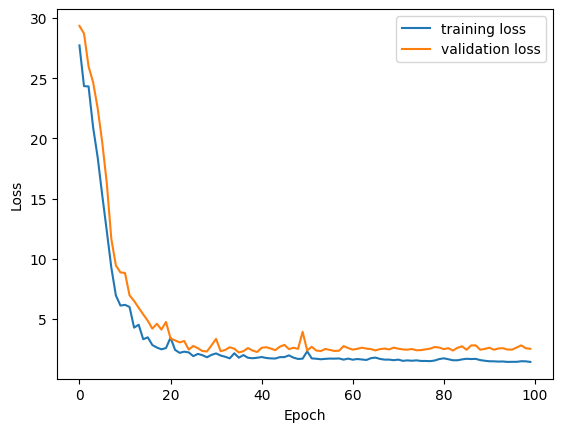

In [28]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label = 'training loss')
plt.plot(history.history['val_loss'], label = 'validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


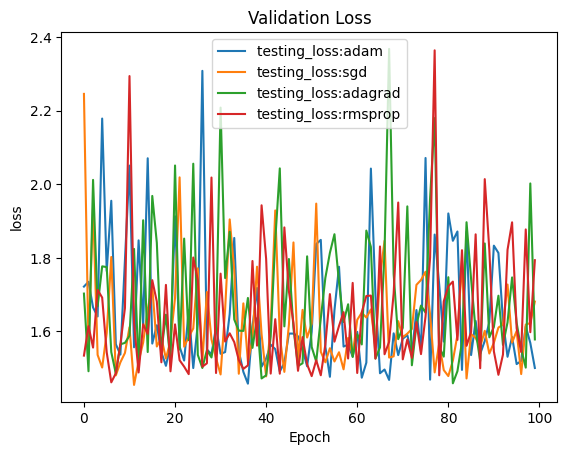

In [42]:
plt.plot(hist1.history['val_loss'], label = 'testing_loss:adam ')
plt.plot(hist2.history['val_loss'], label = 'testing_loss:sgd')
plt.plot(hist3.history['val_loss'], label = 'testing_loss:adagrad')
plt.plot(hist4.history['val_loss'], label = 'testing_loss:rmsprop')
plt.title('Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.legend()
plt.show()